In [10]:
results = {  
    "LGBM_result": {  
        "IC": 0.04993199298180833,  
        "ICIR": 0.401166594497036,  
        "Rank IC": 0.051506972472517176,  
        "Rank ICIR": 0.41964587176278606,  
        "1day_excess_return_without_cost_annualized_return": 0.17808847786474435,  
        "1day_excess_return_without_cost_information_ratio": 2.029781086376785,  
    },  
    "Master_result": {  
        "IC": 0.06221125738364682,  
        "ICIR": 0.4089395569850118,  
        "Rank IC": 0.07537232888943195,  
        "Rank ICIR": 0.500439035041941,  
        "1day_excess_return_without_cost_annualized_return": 0.1829883949498608,  
        "1day_excess_return_without_cost_information_ratio": 1.8468949496149516,  
    },  
    "XGBoost_result": {  
        "IC": 0.05025481658813131,  
        "ICIR": 0.38420942771966826,  
        "Rank IC": 0.048190000441132384,  
        "Rank ICIR": 0.4009205584844637,  
        "1day_excess_return_without_cost_annualized_return": 0.15646559464004772,  
        "1day_excess_return_without_cost_information_ratio": 1.8196832888802212,  
    },  
}  

print(results)  

{'LGBM_result': {'IC': 0.04993199298180833, 'ICIR': 0.401166594497036, 'Rank IC': 0.051506972472517176, 'Rank ICIR': 0.41964587176278606, '1day_excess_return_without_cost_annualized_return': 0.17808847786474435, '1day_excess_return_without_cost_information_ratio': 2.029781086376785}, 'Master_result': {'IC': 0.06221125738364682, 'ICIR': 0.4089395569850118, 'Rank IC': 0.07537232888943195, 'Rank ICIR': 0.500439035041941, '1day_excess_return_without_cost_annualized_return': 0.1829883949498608, '1day_excess_return_without_cost_information_ratio': 1.8468949496149516}, 'XGBoost_result': {'IC': 0.05025481658813131, 'ICIR': 0.38420942771966826, 'Rank IC': 0.048190000441132384, 'Rank ICIR': 0.4009205584844637, '1day_excess_return_without_cost_annualized_return': 0.15646559464004772, '1day_excess_return_without_cost_information_ratio': 1.8196832888802212}}


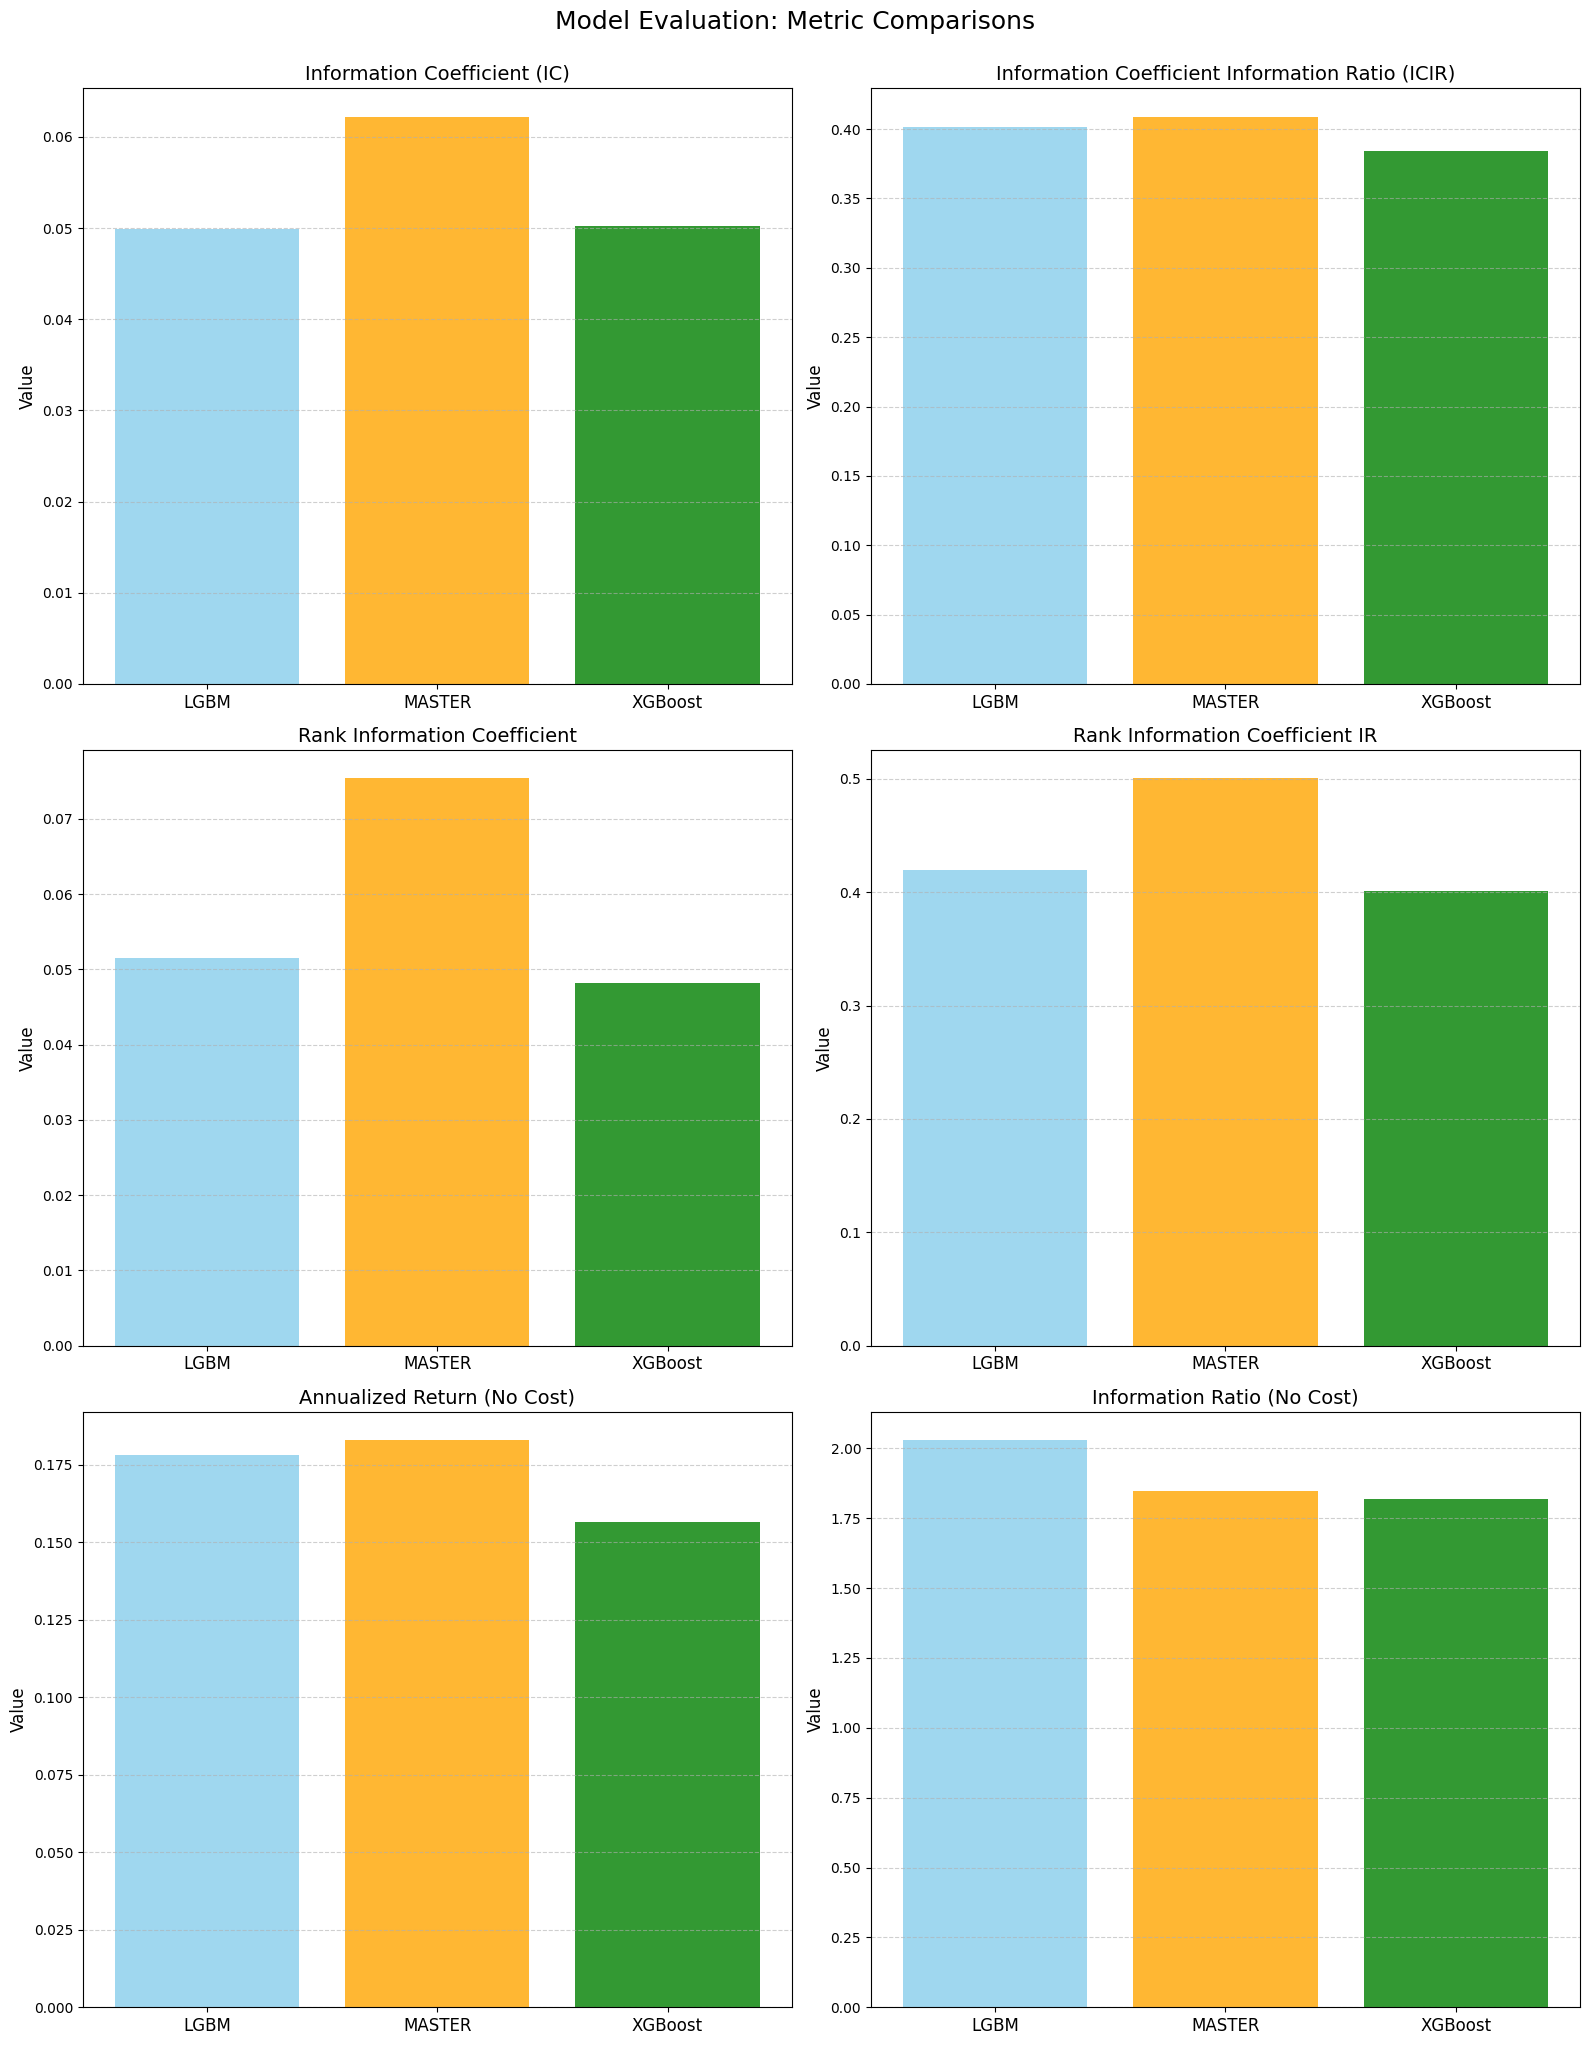

In [12]:
# Extract models and metrics  
models = list(results.keys())  
metrics = [  
    "IC", "ICIR", "Rank IC", "Rank ICIR",   
    "1day_excess_return_without_cost_annualized_return",   
    "1day_excess_return_without_cost_information_ratio"  
]  
metric_labels = {  
    "IC": "Information Coefficient (IC)",  
    "ICIR": "Information Coefficient Information Ratio (ICIR)",  
    "Rank IC": "Rank Information Coefficient",  
    "Rank ICIR": "Rank Information Coefficient IR",  
    "1day_excess_return_without_cost_annualized_return": "Annualized Return (No Cost)",  
    "1day_excess_return_without_cost_information_ratio": "Information Ratio (No Cost)"  
}  

# Prepare data for easier reuse  
data = {metric: [results[model][metric] for model in models] for metric in metrics}  

# Generate a series of bar plots for each metric  
plt.figure(figsize=(16, 20))  
for i, metric in enumerate(metrics, 1):  
    plt.subplot(3, 2, i)  # Arrange plots in 3 rows and 2 columns  
    plt.bar(models, data[metric], color=["skyblue", "orange", "green"], alpha=0.8)  
    plt.title(metric_labels[metric], fontsize=14)  
    plt.ylabel("Value", fontsize=12)  
    plt.xticks(ticks=np.arange(len(models)), labels=["LGBM", "MASTER", "XGBoost"], fontsize=12)  
    plt.grid(axis="y", linestyle="--", alpha=0.6)  

# Adjust layout and show plots  
plt.tight_layout()  
plt.suptitle("Model Evaluation: Metric Comparisons", fontsize=18, y=1.02)  
plt.show()  

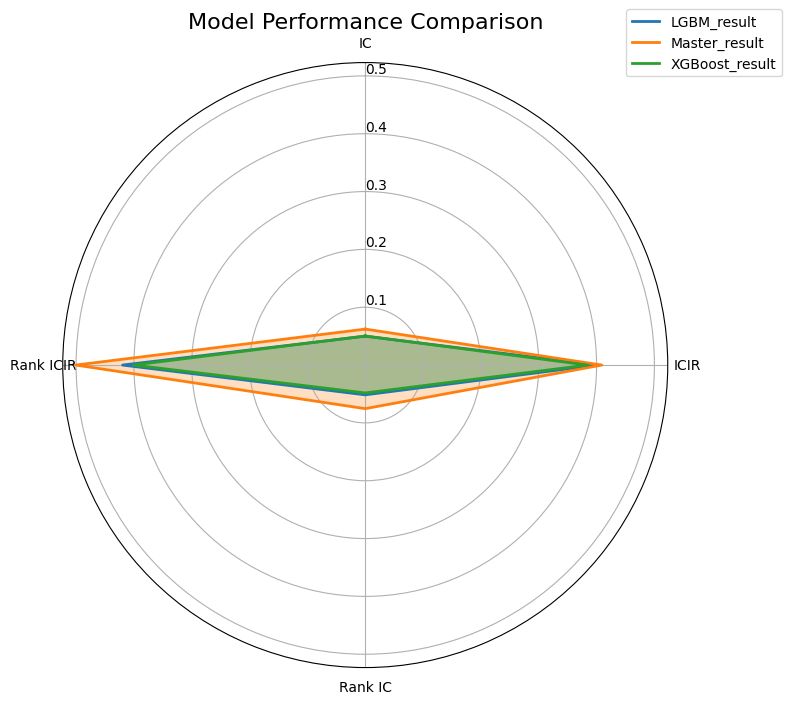

In [21]:

    import matplotlib.pyplot as plt
    import numpy as np

    # Data
    results = {
        "LGBM_result": {
            "IC": 0.04993199298180833,
            "ICIR": 0.401166594497036,
            "Rank IC": 0.051506972472517176,
            "Rank ICIR": 0.41964587176278606,
            # "1day_excess_return_without_cost_annualized_return": 0.17808847786474435,
            # "1day_excess_return_without_cost_information_ratio": 2.029781086376785,
        },
        "Master_result": {
            "IC": 0.06221125738364682,
            "ICIR": 0.4089395569850118,
            "Rank IC": 0.07537232888943195,
            "Rank ICIR": 0.500439035041941,
            # "1day_excess_return_without_cost_annualized_return": 0.1829883949498608,
            # "1day_excess_return_without_cost_information_ratio": 1.8468949496149516,
        },
        "XGBoost_result": {
            "IC": 0.05025481658813131,
            "ICIR": 0.38420942771966826,
            "Rank IC": 0.048190000441132384,
            "Rank ICIR": 0.4009205584844637,
            # "1day_excess_return_without_cost_annualized_return": 0.15646559464004772,
            # "1day_excess_return_without_cost_information_ratio": 1.8196832888802212,
        },
    }

    # Extract values for radar chart
    metrics = list(results["LGBM_result"].keys())
    labels = list(results.keys())
    num_metrics = len(metrics)

    # Normalize the values for better comparison (optional, can skip normalization if metrics are on a comparable scale)
    normalized_results = {}
    for model, metrics_values in results.items():
        normalized_results[model] = [metrics_values[metric] for metric in metrics]

    # Prepare data for plot
    angles = np.linspace(0, 2 * np.pi, num_metrics, endpoint=False).tolist()
    angles += angles[:1]  # Rotate to complete the circle

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    # Add each model's data to the radar chart
    for model, values in normalized_results.items():
        values += values[:1]  # Complete the circle
        ax.plot(angles, values, label=model, linewidth=2)
        ax.fill(angles, values, alpha=0.25)

    # Set the legend and labels
    ax.set_title("Model Performance Comparison", fontsize=16)
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(metrics, fontsize=10)
    ax.set_rlabel_position(0)
    ax.legend(loc="upper right", bbox_to_anchor=(1.2, 1.1), fontsize=10)

    # Show the chart
    plt.tight_layout()
    plt.show()


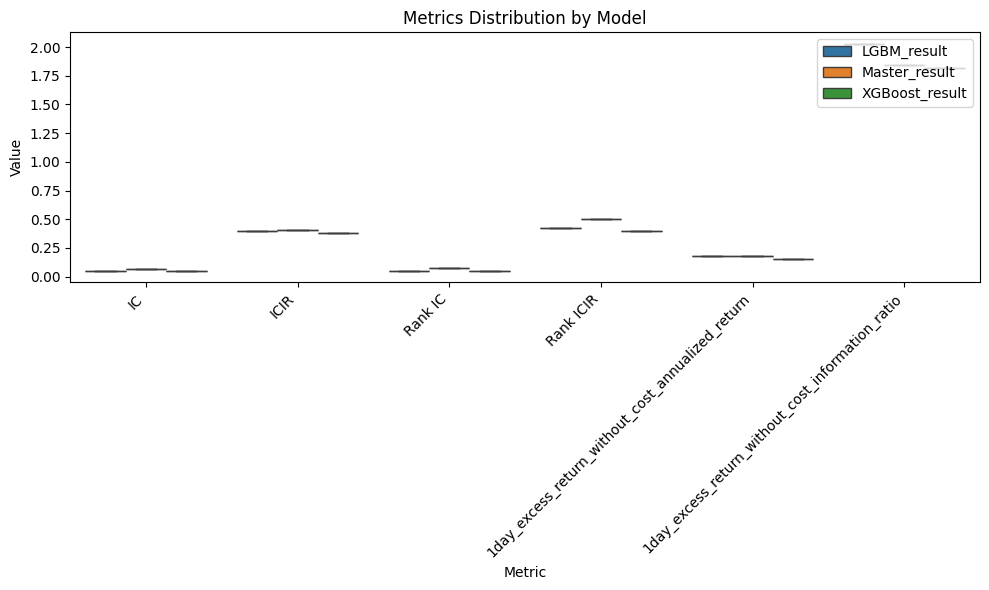

In [ ]:
import matplotlib.pyplot as plt  


results = {
        "LGBM_result": {
            "IC": 0.04993199298180833,
            "ICIR": 0.401166594497036,
            "Rank IC": 0.051506972472517176,
            "Rank ICIR": 0.41964587176278606,
            "1day_excess_return_without_cost_annualized_return": 0.17808847786474435,
            "1day_excess_return_without_cost_information_ratio": 2.029781086376785,
        },
        "Master_result": {
            "IC": 0.06221125738364682,
            "ICIR": 0.4089395569850118,
            "Rank IC": 0.07537232888943195,
            "Rank ICIR": 0.500439035041941,
            "1day_excess_return_without_cost_annualized_return": 0.1829883949498608,
            "1day_excess_return_without_cost_information_ratio": 1.8468949496149516,
        },
        "XGBoost_result": {
            "IC": 0.05025481658813131,
            "ICIR": 0.38420942771966826,
            "Rank IC": 0.048190000441132384,
            "Rank ICIR": 0.4009205584844637,
            "1day_excess_return_without_cost_annualized_return": 0.15646559464004772,
            "1day_excess_return_without_cost_information_ratio": 1.8196832888802212,
        },
    }
# Data Preparation  
from pandas.plotting import parallel_coordinates  
import pandas as pd  
import matplotlib.pyplot as plt  

# Prepare data  
df = pd.DataFrame(results).T.reset_index().rename(columns={"index": "Model"})  

# Plot parallel coordinates  
plt.figure(figsize=(10, 6))  
parallel_coordinates(df, class_column="Model", colormap="Set2")  
plt.xticks(rotation=45, ha="right")  
plt.title("Parallel Coordinates Plot for Model Metrics")  
plt.tight_layout()  
plt.show()  